In [10]:
import pandas as pd
import matplotlib as plt
import data_analisy
import data_cleaner

# Entendimento e Leitura da base de dados (Censo Escolar 2021)

In [14]:
df_no_treatment = data_cleaner.csv_to_dataframe('censo_escolar_2021.csv')
pd.set_option('display.max_columns', None)
column_names = df_no_treatment.columns.tolist()
column_names

['NU_ANO_CENSO',
 'NO_REGIAO',
 'CO_REGIAO',
 'NO_UF',
 'SG_UF',
 'CO_UF',
 'NO_MUNICIPIO',
 'CO_MUNICIPIO',
 'NO_MESORREGIAO',
 'CO_MESORREGIAO',
 'NO_MICRORREGIAO',
 'CO_MICRORREGIAO',
 'CO_DISTRITO',
 'CO_ENTIDADE',
 'NO_ENTIDADE',
 'TP_DEPENDENCIA',
 'TP_CATEGORIA_ESCOLA_PRIVADA',
 'TP_LOCALIZACAO',
 'TP_LOCALIZACAO_DIFERENCIADA',
 'DS_ENDERECO',
 'NU_ENDERECO',
 'DS_COMPLEMENTO',
 'NO_BAIRRO',
 'CO_CEP',
 'NU_DDD',
 'NU_TELEFONE',
 'TP_SITUACAO_FUNCIONAMENTO',
 'CO_ORGAO_REGIONAL',
 'DT_ANO_LETIVO_INICIO',
 'DT_ANO_LETIVO_TERMINO',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'IN_CONVENIADA_PP',
 'TP_CONVENIO_PODER_PUBLICO',
 'IN_MANT_ESCOLA_PRIVADA_EMP',
 'IN_MANT_ESCOLA_PRIVADA_ONG',
 'IN_MANT_ESCOLA_PRIVADA_OSCIP',
 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
 'IN_MANT_ESCOLA_PRIVADA_SIND',
 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
 'IN_MANT_ESCOLA_PRIVADA_S_FINS',
 'NU_CNPJ_ESCOLA_PRIVADA',
 'NU_CNPJ_MANTENEDORA',

Olhando para essa lista de colunas e comparando com os seus respectivos significados na planilha de extensão xlsx "dicionario_de_dados", obtemos informações sobre quais parâmetros são trackeados dentro dessa base. Assim, decidimos nessa análise seguir por um caminho de estudo a fim de indentificar qual o enfoque entre o setor privado e público no tipo de ensino, seja esse Educação Infantil, Ensino Fundamental e Ensino Médio. 

# Tratamento

## Definição de indicadores a serem considerados na análise: 
- "NO_REGIAO" -> Nome da região geográfica
- "NO_UF" ->  Nome da Unidade da Federação
- "TP_DEPENDENCIA" -> Dependência Administrativa (1 - Federal; 2 - Estadual; 3 - Municipal; 4 - Privada)
- "QT_MAT_INF_INT" -> Número de Matrículas na Educação Infantil - Tempo Integral
- "QT_MAT_INF_CRE_INT" -> Número de Matrículas na Educação Infantil - Creche - Tempo Integral
- "QT_MAT_INF_PRE_INT" -> Número de Matrículas na Educação Infantil - Pré-Escola - Tempo Integral
- "QT_MAT_FUND_INT" -> Número de Matrículas no Ensino Fundamental - Tempo Integral
- "QT_MAT_FUND_AI_INT" -> Número de Matrículas no Ensino Fundamental - Anos Iniciais - Tempo Integral
- "QT_MAT_FUND_AF_INT" -> Número de Matrículas no Ensino Fundamental - Anos Finais - Tempo Integral
- "QT_MAT_MED_INT" -> Número de Matrículas no Ensino Médio - Tempo Integral

In [17]:
indicadores_iniciais = df_no_treatment.loc[:, ["NO_REGIAO", "NO_UF", "TP_DEPENDENCIA", "QT_MAT_INF_INT", "QT_MAT_INF_CRE_INT","QT_MAT_INF_PRE_INT",
                                               "QT_MAT_FUND_INT", "QT_MAT_FUND_AI_INT", "QT_MAT_FUND_AF_INT", "QT_MAT_MED_INT" ]]
indicadores_iniciais

,NO_REGIAO,NO_UF,TP_DEPENDENCIA,QT_MAT_INF_INT,QT_MAT_INF_CRE_INT,QT_MAT_INF_PRE_INT,QT_MAT_FUND_INT,QT_MAT_FUND_AI_INT,QT_MAT_FUND_AF_INT,QT_MAT_MED_INT
0,Norte,Rond⌠nia,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Norte,Rond⌠nia,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Norte,Rond⌠nia,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norte,Rond⌠nia,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Norte,Rond⌠nia,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
80600,Nordeste,Alagoas,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80601,Nordeste,Alagoas,3,100.0,100.0,0.0,0.0,0.0,0.0,0.0
80602,Nordeste,Alagoas,4,22.0,17.0,5.0,0.0,0.0,0.0,0.0
80603,Nordeste,Alagoas,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Com o intuito de fazer uma análise mais condizente, iremos formatar possíveis textos, como os de "NO_UF" e descartar dados nulos. Observemos que dados nulos, são sim dados pertinentes para nós nesse caso, indicando que a referente escola não possui matrículas no referente tipo de ensino. 


In [18]:
indicadores_iniciais = data_cleaner.corrige_nome_estados(indicadores_iniciais)
indicadores_iniciais = indicadores_iniciais.dropna()
indicadores_iniciais

,NO_REGIAO,NO_UF,TP_DEPENDENCIA,QT_MAT_INF_INT,QT_MAT_INF_CRE_INT,QT_MAT_INF_PRE_INT,QT_MAT_FUND_INT,QT_MAT_FUND_AI_INT,QT_MAT_FUND_AF_INT,QT_MAT_MED_INT
0,Norte,Rondônia,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Norte,Rondônia,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Norte,Rondônia,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norte,Rondônia,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Norte,Rondônia,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
80599,Nordeste,Alagoas,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80600,Nordeste,Alagoas,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80601,Nordeste,Alagoas,3,100.0,100.0,0.0,0.0,0.0,0.0,0.0
80602,Nordeste,Alagoas,4,22.0,17.0,5.0,0.0,0.0,0.0,0.0


In [20]:
indicadores_iniciais["QT_MAT_INF"] = indicadores_iniciais["QT_MAT_INF_INT"] + indicadores_iniciais["QT_MAT_INF_CRE_INT"] + indicadores_iniciais["QT_MAT_INF_PRE_INT"]
indicadores_iniciais["QT_MAT_FUND"] = indicadores_iniciais["QT_MAT_FUND_INT"] + indicadores_iniciais["QT_MAT_FUND_AI_INT"] + indicadores_iniciais["QT_MAT_FUND_AF_INT"]
indicadores_iniciais["QT_MAT_MED"] = indicadores_iniciais["QT_MAT_MED_INT"]

# Criando o novo dataframe com as colunas desejadas
novo_dataframe = indicadores_iniciais[["NO_REGIAO", "NO_UF", "TP_DEPENDENCIA", "QT_MAT_INF", "QT_MAT_FUND", "QT_MAT_MED"]]

novo_dataframe

C:\Users\joaof\AppData\Local\Temp\ipykernel_35080\2418343201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicadores_iniciais["QT_MAT_INF"] = indicadores_iniciais["QT_MAT_INF_INT"] + indicadores_iniciais["QT_MAT_INF_CRE_INT"] + indicadores_iniciais["QT_MAT_INF_PRE_INT"]
C:\Users\joaof\AppData\Local\Temp\ipykernel_35080\2418343201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicadores_iniciais["QT_MAT_FUND"] = indicadores_iniciais["QT_MAT_FUND_INT"] + indicadores_iniciais["QT_MAT_FUND_AI_INT

,NO_REGIAO,NO_UF,TP_DEPENDENCIA,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED
0,Norte,Rondônia,2,0.0,0.0,0.0
1,Norte,Rondônia,2,0.0,0.0,0.0
2,Norte,Rondônia,3,0.0,0.0,0.0
3,Norte,Rondônia,3,0.0,0.0,0.0
4,Norte,Rondônia,3,0.0,0.0,0.0
...,...,...,...,...,...,...
80599,Nordeste,Alagoas,4,0.0,0.0,0.0
80600,Nordeste,Alagoas,4,0.0,0.0,0.0
80601,Nordeste,Alagoas,3,200.0,0.0,0.0
80602,Nordeste,Alagoas,4,44.0,0.0,0.0


Agora vamos eliminar as linhas que possuem 0 alunos matriculados em todas as instâncias, pois não queremos fazer a análise em cima de escolas que não estejam funcionando. (Será utilizada a assumption de que escolas que não possuem alunos matriculados em nenhum das três estapas de ensino é uma escola que não está em funcionamento no corrente ano da pesquisa, 2021, logo não queremos utilizá-lo para a análise)

In [23]:
# Removendo linhas com valor diferente de 0 nas colunas "QT_MAT_INF", "QT_MAT_FUND", "QT_MAT_MED"
treated_dataframe = novo_dataframe.loc[
    (novo_dataframe[["QT_MAT_INF", "QT_MAT_FUND", "QT_MAT_MED"]] != 0).any(axis=1)
]

# Exibindo o novo dataframe sem linhas onde as três colunas são 0 simultaneamente
print(treated_dataframe)



      NO_REGIAO     NO_UF  TP_DEPENDENCIA  QT_MAT_INF  QT_MAT_FUND  QT_MAT_MED
8         Norte  Rondônia               2         0.0          0.0       190.0
24        Norte  Rondônia               3       146.0          0.0         0.0
44        Norte  Rondônia               4       110.0          0.0         0.0
49        Norte  Rondônia               3         0.0        530.0         0.0
60        Norte  Rondônia               3         0.0        970.0         0.0
...         ...       ...             ...         ...          ...         ...
80558  Nordeste   Alagoas               3       168.0          0.0         0.0
80586  Nordeste   Alagoas               4        40.0          0.0         0.0
80589  Nordeste   Alagoas               3        34.0          0.0         0.0
80601  Nordeste   Alagoas               3       200.0          0.0         0.0
80602  Nordeste   Alagoas               4        44.0          0.0         0.0

[11650 rows x 6 columns]


Reduzimos a quantidade de dados interessantes para a nossa análise para 11650 escolas. Com a base filtrada e correta podemos seguir para análise.

## Análise

Inicialmente iremos analisar sobre uma perspectiva geral brasileira alguns indicadores a respeito da quantidade de matriculados em cada um dos respectivos ensinos. 

- Ensino Infatil (5 anos)

In [25]:
ensino_infatil_statistics1 = data_analisy.measure_tendency(treated_dataframe, "QT_MAT_INF")
ensino_infatil_statistics2 = data_analisy.measure_dispersion(treated_dataframe, "QT_MAT_INF")

print(f'A média é: {ensino_infatil_statistics1[0]}; \nA mediana é: {ensino_infatil_statistics1[1]}; \nA moda é: {ensino_infatil_statistics1[2]}')
print(f'O desvio padrão é: {ensino_infatil_statistics2[0]}; \nA variância é: {ensino_infatil_statistics2[1]}; \nO valor máximo é: {ensino_infatil_statistics2[2]}; \nO valor mínimo é: {ensino_infatil_statistics2[3]}; \nA amplitude é de: {ensino_infatil_statistics2[4]}')

A média é: 43.031; 
A mediana é: 0.0; 
A moda é: 0.0
O desvio padrão é: 99.211; 
A variância é: 9842.836; 
O valor máximo é: 1616.0; 
O valor mínimo é: 0.0; 
A amplitude é de: 1616.0


- Ensino Fundamental (9 anos)

In [26]:
ensino_fundamental_statistics1 = data_analisy.measure_tendency(treated_dataframe, "QT_MAT_FUND")
ensino_fundamental_statistics2 = data_analisy.measure_dispersion(treated_dataframe, "QT_MAT_FUND")

print(f'A média é: {ensino_fundamental_statistics1[0]}; \nA mediana é: {ensino_fundamental_statistics1[1]}; \nA moda é: {ensino_fundamental_statistics1[2]}')
print(f'O desvio padrão é: {ensino_fundamental_statistics2[0]}; \nA variância é: {ensino_fundamental_statistics2[1]}; \nO valor máximo é: {ensino_fundamental_statistics2[2]}; \nO valor mínimo é: {ensino_fundamental_statistics2[3]}; \nA amplitude é de: {ensino_fundamental_statistics2[4]}')

A média é: 157.174; 
A mediana é: 44.0; 
A moda é: 0.0
O desvio padrão é: 255.406; 
A variância é: 65232.04; 
O valor máximo é: 2558.0; 
O valor mínimo é: 0.0; 
A amplitude é de: 2558.0


- Ensino médio (3 anos)

In [27]:
ensino_medio_statistics1 = data_analisy.measure_tendency(treated_dataframe, "QT_MAT_MED")
ensino_medio_statistics2 = data_analisy.measure_dispersion(treated_dataframe, "QT_MAT_MED")

print(f'A média é: {ensino_medio_statistics1[0]}; \nA mediana é: {ensino_medio_statistics1[1]}; \nA moda é: {ensino_medio_statistics1[2]}')
print(f'O desvio padrão é: {ensino_medio_statistics2[0]}; \nA variância é: {ensino_medio_statistics2[1]}; \nO valor máximo é: {ensino_medio_statistics2[2]}; \nO valor mínimo é: {ensino_medio_statistics2[3]}; \nA amplitude é de: {ensino_medio_statistics2[4]}')

A média é: 44.253; 
A mediana é: 0.0; 
A moda é: 0.0
O desvio padrão é: 125.307; 
A variância é: 15701.832; 
O valor máximo é: 1103.0; 
O valor mínimo é: 0.0; 
A amplitude é de: 1103.0


Daí já conseguimos ter algumas observações sobre o aspecto geral da distribuição de matrículas entre os diferentes níveis de ensino ao redor do Brazil nas escolas mapeadas no censo de 2021. Vemos que a quantidade de matrículas no ensino fundamental é consideravelmente maior, o que faz sentido visto que a mesma possui um spectro de 3x o tempo de duração do ensino médio por exemplo e é normalmente onde começa a educação obrigatória brasileira, sendo o ensino infatil opcional seu cumprimento durantes os 5 anos disponíveis.

Com essa breve noção do espectro brasileiro quanto a quantidade de matrículas geral nos respectivos ensinos, vamos partir para o seguimento quanto ao tipo de dependência administrativa. 

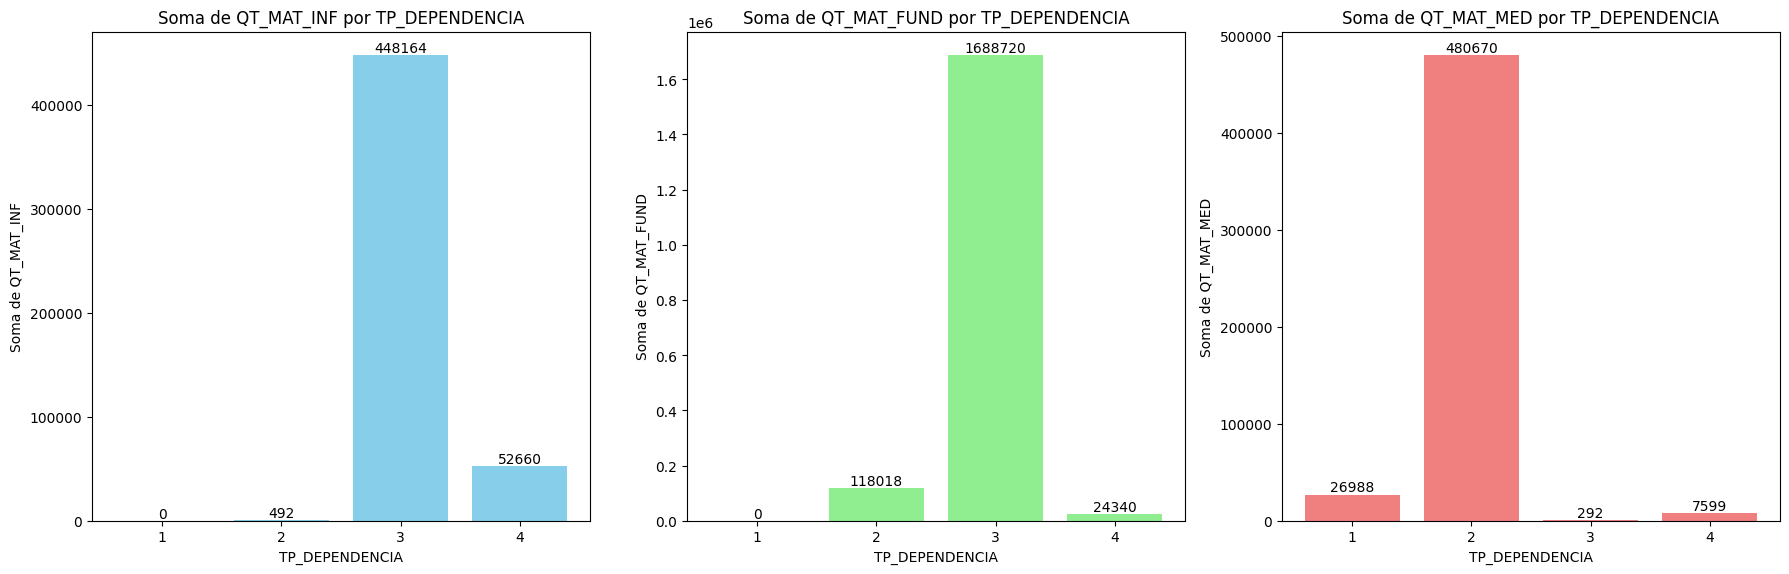

In [29]:
import matplotlib.pyplot as plt

# Agrupando os dados por TP_DEPENDENCIA e somando as métricas
grupo_dependencia = treated_dataframe.groupby('TP_DEPENDENCIA').agg({
    'QT_MAT_INF': 'sum',
    'QT_MAT_FUND': 'sum',
    'QT_MAT_MED': 'sum'
})

# Criando uma figura com 3 subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Gráfico para QT_MAT_INF por TP_DEPENDENCIA
bars1 = ax[0].bar(grupo_dependencia.index, grupo_dependencia['QT_MAT_INF'], color='skyblue')
ax[0].set_xlabel('TP_DEPENDENCIA')
ax[0].set_ylabel('Soma de QT_MAT_INF')
ax[0].set_title('Soma de QT_MAT_INF por TP_DEPENDENCIA')
for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Gráfico para QT_MAT_FUND por TP_DEPENDENCIA
bars2 = ax[1].bar(grupo_dependencia.index, grupo_dependencia['QT_MAT_FUND'], color='lightgreen')
ax[1].set_xlabel('TP_DEPENDENCIA')
ax[1].set_ylabel('Soma de QT_MAT_FUND')
ax[1].set_title('Soma de QT_MAT_FUND por TP_DEPENDENCIA')
for bar in bars2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Gráfico para QT_MAT_MED por TP_DEPENDENCIA
bars3 = ax[2].bar(grupo_dependencia.index, grupo_dependencia['QT_MAT_MED'], color='lightcoral')
ax[2].set_xlabel('TP_DEPENDENCIA')
ax[2].set_ylabel('Soma de QT_MAT_MED')
ax[2].set_title('Soma de QT_MAT_MED por TP_DEPENDENCIA')
for bar in bars3:
    yval = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Definindo o eixo x para mostrar apenas 1, 2, 3, 4
for a in ax:
    a.set_xticks([1, 2, 3, 4])

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()
